<a href="https://colab.research.google.com/github/SoheliPaul/Machine-Learning/blob/main/Lab8_2348561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv('/content/spam_or_not_spam (1).csv')
df.head(10)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
5,i just had to jump in here as carbonara is on...,0
6,the scotsman NUMBER august NUMBER playboy want...,0
7,martin adamson wrote isn t it just basically a...,0
8,the scotsman thu NUMBER aug NUMBER meaningful ...,0
9,i have been trying to research via sa mirrors ...,0


In [40]:
df.isna().sum()

email    1
label    0
dtype: int64

In [42]:
df.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


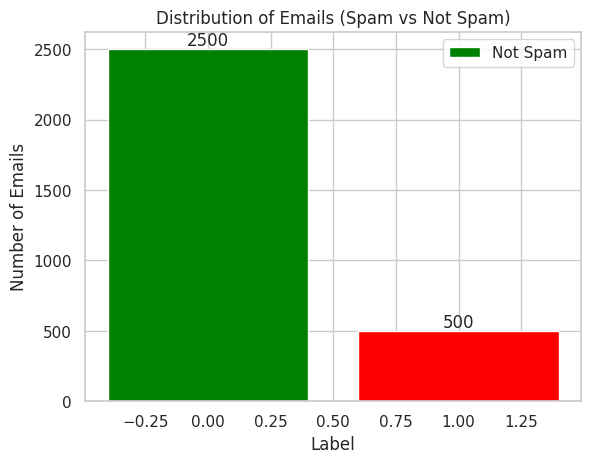

In [43]:
label_counts = df['label'].value_counts()

# Plotting the bar chart
plt.bar(label_counts.index, label_counts.values, color=['green', 'red'])

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Number of Emails')
plt.title('Distribution of Emails (Spam vs Not Spam)')

# Adding annotations
for i, value in enumerate(label_counts.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Adding legend
plt.legend(['Not Spam', 'Spam'])

# Display the plot
plt.show()

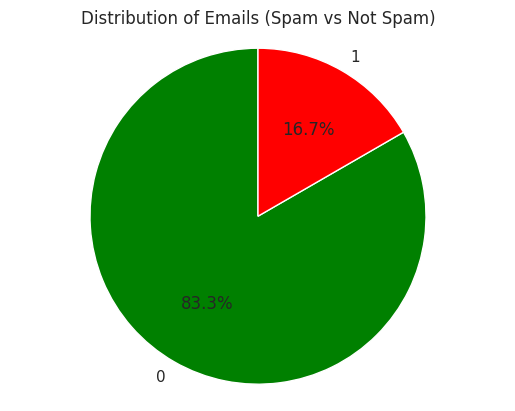

In [44]:
label_counts = df['label'].value_counts()

# Plotting the pie chart using Matplotlib
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adding a title
plt.title('Distribution of Emails (Spam vs Not Spam)')

# Display the plot
plt.show()


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataset is in a DataFrame called 'df'
# 'email' column contains the email text, and 'label' column contains 0 for 'Not Spam' and 1 for 'Spam'

# Drop rows with missing email values
df = df.dropna(subset=['email'])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Training the Naive Bayes model with Laplace smoothing
alpha_value = 1.0  # Laplace smoothing parameter (add-one smoothing)
naive_bayes_model = MultinomialNB(alpha=alpha_value)
naive_bayes_model.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred = naive_bayes_model.predict(X_test_tfidf)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       500
           1       1.00      0.57      0.73       100

    accuracy                           0.93       600
   macro avg       0.96      0.78      0.84       600
weighted avg       0.93      0.93      0.92       600



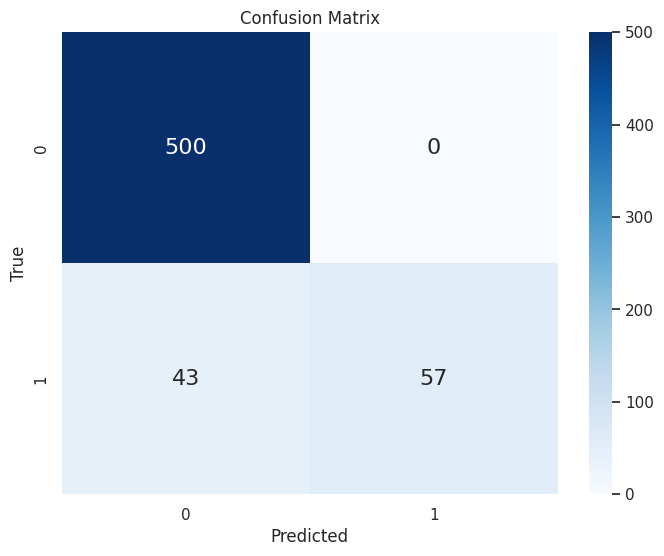

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your Naive Bayes model and made predictions
# Replace 'naive_bayes_model' and 'X_test_tfidf' with your actual model and test data
y_pred = naive_bayes_model.predict(X_test_tfidf)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Adding labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()


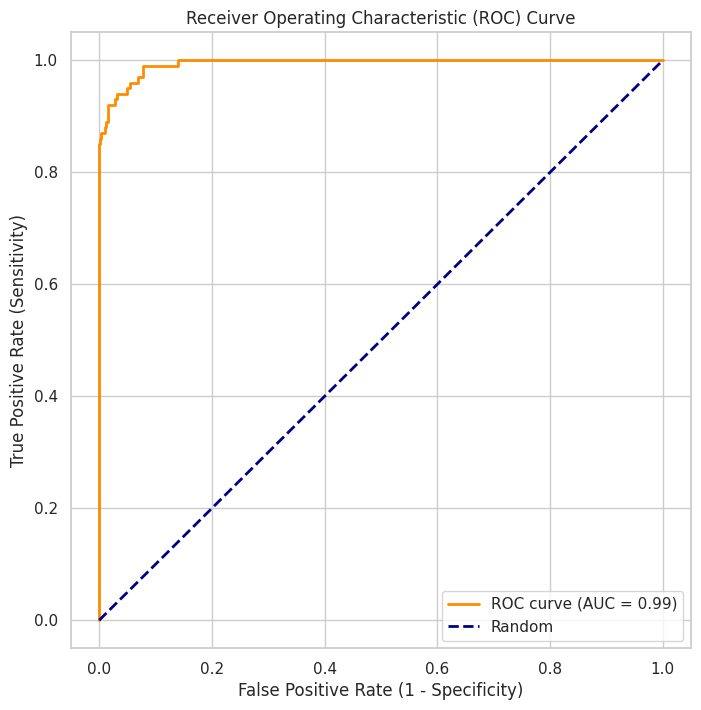

In [50]:
from sklearn.metrics import roc_curve, auc
# Assuming you have already trained your Naive Bayes model and made predictions
# Replace 'naive_bayes_model' and 'X_test_tfidf' with your actual model and test data
y_pred_prob = naive_bayes_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')

# Set labels and title
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()


The ROC curve aids in threshold selection for spam detection by visualizing the impact of Laplace smoothing on sensitivity and specificity at different decision thresholds. It allows practitioners to make informed decisions based on the desired trade-off between true positives and false positives.

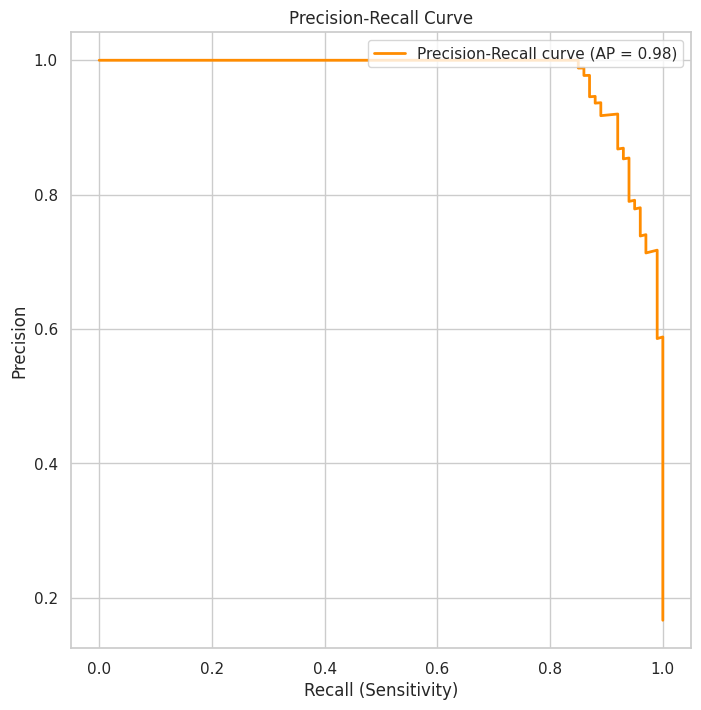

In [53]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Compute the area under the precision-recall curve
average_precision = average_precision_score(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')

plt.show()


Significance of Precision and Recall in Spam Detection:

Precision: The fraction of detected spam emails that are actually spam. High precision indicates low false positive rate, minimizing the risk of classifying legitimate emails as spam.

Recall: The fraction of actual spam emails that are correctly detected. High recall indicates a low false negative rate, minimizing the risk of missing spam emails.

Effect of Laplace Smoothing:

Precision: Laplace smoothing can stabilize probability estimates, preventing extreme values. This can lead to a more balanced precision, especially when dealing with rare events like spam.

Recall: Laplace smoothing helps avoid zero probabilities, ensuring that even unseen features contribute to the model. This can enhance recall by reducing the risk of missing important spam indicators.

In short, precision and recall are vital for assessing the accuracy and completeness of spam detection. Laplace smoothing helps address uncertainties in probability estimates, contributing to more balanced and robust performance.







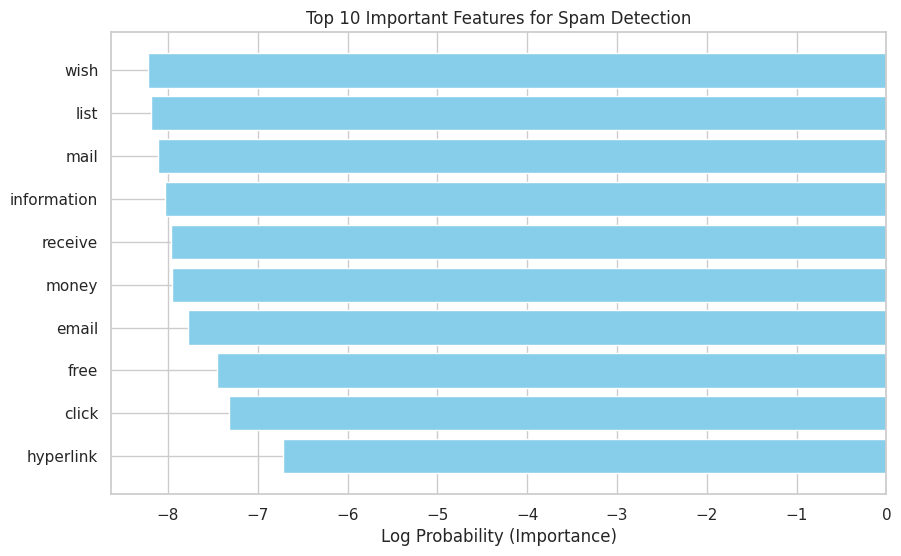

In [54]:
# Get feature names (words or phrases)
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Get log probabilities from the model
log_probs = naive_bayes_model.feature_log_prob_[1, :]  # Assuming you're interested in the positive class (spam)

# Combine feature names with log probabilities
feature_importance = list(zip(feature_names, log_probs))

# Sort features by importance
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Choose the top N features
top_n = 10  # You can adjust this value based on the number of features you want to display
top_features = feature_importance[:top_n]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), [x[1] for x in top_features], align='center', color='skyblue')
plt.yticks(range(len(top_features)), [x[0] for x in top_features])
plt.xlabel('Log Probability (Importance)')
plt.title(f'Top {top_n} Important Features for Spam Detection')

plt.show()

Feature selection in spam detection is a critical step for building efficient, interpretable, and generalizable models. It enhances model performance, reduces computational demands, and facilitates a better understanding of the underlying characteristics of spam emails. The careful selection of features is essential for achieving accurate and scalable spam detection systems in real-world applications.

      Metric     Score
0   Accuracy  0.928333
1  Precision  1.000000
2     Recall  0.570000
3   F1 Score  0.726115
4    AUC-ROC  0.993960


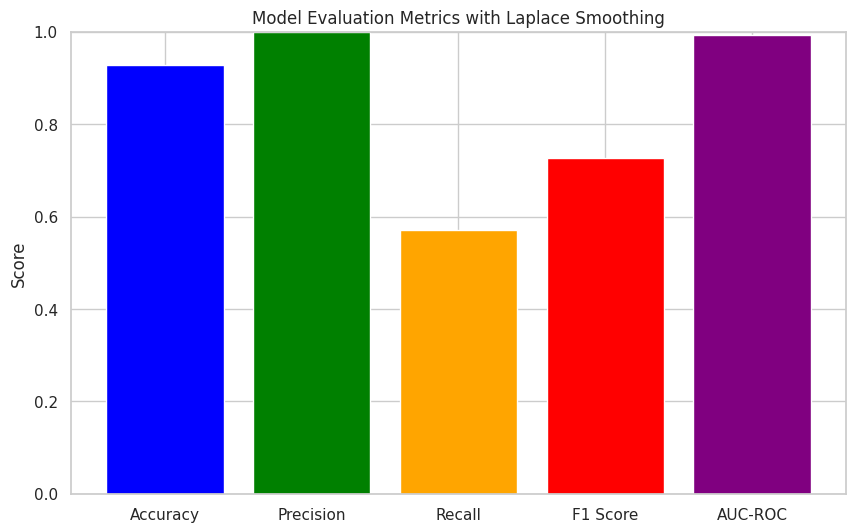

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Create a DataFrame to store the results
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Visualize the metrics in a table
print(metrics_df)

# Create a multi-bar chart for better visualization
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Metric'], metrics_df['Score'], color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Model Evaluation Metrics with Laplace Smoothing')
plt.ylabel('Score')
plt.show()

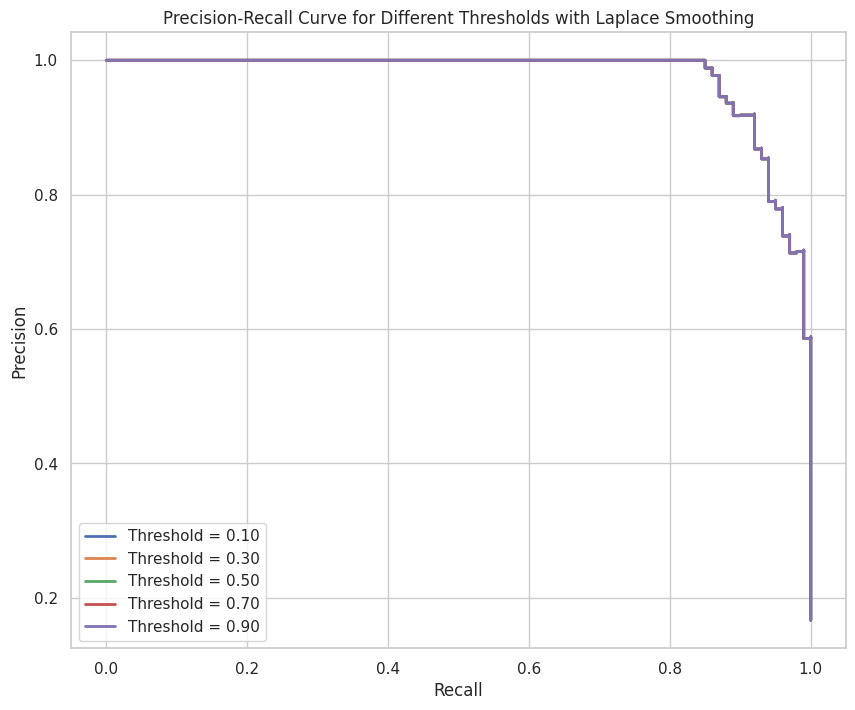

In [58]:
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

# Plot precision-recall curves for different thresholds
plt.figure(figsize=(10, 8))

for threshold in thresholds:
    y_pred = (y_pred_prob > threshold).astype(int)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.step(recall, precision, label=f'Threshold = {threshold:.2f}', linewidth=2)

# Plotting options
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Different Thresholds with Laplace Smoothing')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

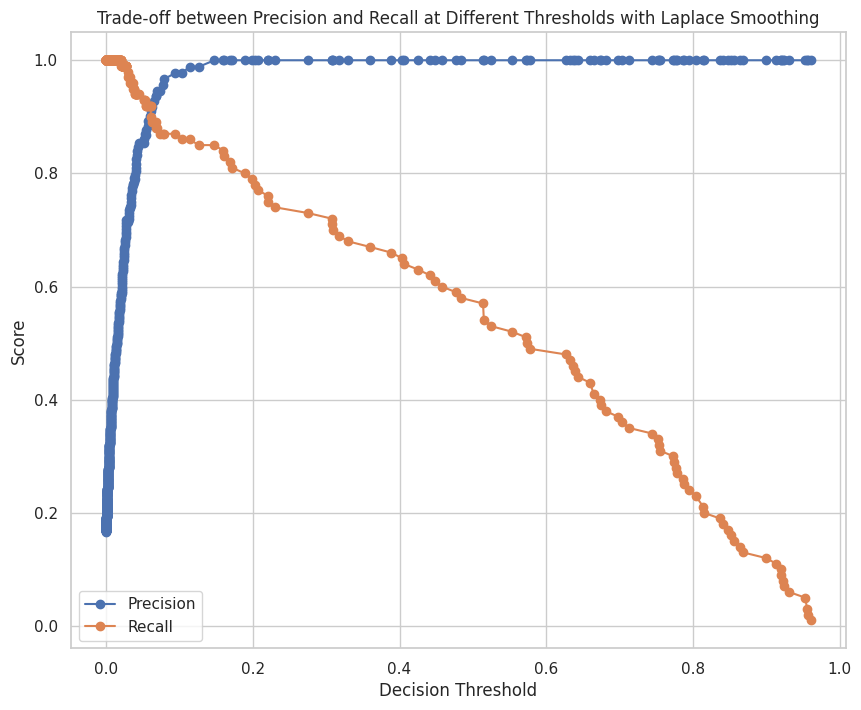

In [59]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plotting the trade-off between precision and recall
plt.figure(figsize=(10, 8))
plt.plot(thresholds, precision[:-1], label='Precision', marker='o')
plt.plot(thresholds, recall[:-1], label='Recall', marker='o')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.title('Trade-off between Precision and Recall at Different Thresholds with Laplace Smoothing')
plt.legend()
plt.grid(True)
plt.show()

Line Graph: Trade-offs between Precision and Recall at Different Thresholds

Significance:

This line graph illustrates how the precision and recall of the spam detection model vary with different decision thresholds.
As the threshold increases or decreases, the trade-off between precision and recall becomes evident.

Contribution to Assessment:

Helps in understanding the balance between false positives (precision) and false negatives (recall) as the decision threshold changes.
Identifies regions where precision or recall can be optimized based on the specific requirements of the spam detection application.
Facilitates the selection of an appropriate threshold that aligns with the desired precision-recall trade-off.

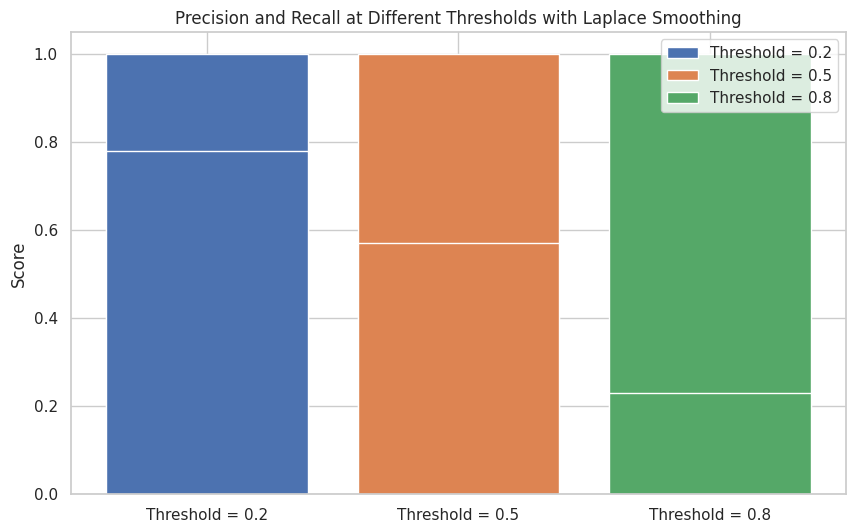

In [60]:
# Choose specific thresholds for the bar chart
selected_thresholds = [0.2, 0.5, 0.8]

# Plotting a bar chart for precision and recall at selected thresholds
plt.figure(figsize=(10, 6))

for threshold in selected_thresholds:
    index = next(i for i, t in enumerate(thresholds) if t >= threshold)
    plt.bar(f'Threshold = {threshold}', [precision[index], recall[index]], label=f'Threshold = {threshold}')

# Plotting options
plt.ylabel('Score')
plt.title('Precision and Recall at Different Thresholds with Laplace Smoothing')
plt.legend()
plt.show()

Bar Chart: Precision and Recall at Selected Thresholds

Significance:

This bar chart provides a focused view of precision and recall at specific thresholds, allowing for a more detailed analysis.
Each bar represents the performance of the model at a particular decision threshold.

Contribution to Assessment:

Enables a direct comparison of precision and recall at key decision thresholds.
Highlights the impact of Laplace smoothing on precision and recall values.
Helps in making informed decisions about the threshold setting based on the desired balance between precision and recall.


Challenges/Considerations with Laplace Smoothing:

Interpretability Challenges: Smoothing can make probability estimates less intuitive, complicating the interpretation of model results.

Effect on Extreme Probabilities: Laplace smoothing prevents extreme probabilities but may introduce biases, especially with limited data.

Impact on Feature Importance: Smoothing can affect the perceived importance of features, potentially leading to suboptimal feature selection.

Choosing the Smoothing Parameter: Selecting an appropriate smoothing parameter (alpha) requires careful consideration to avoid under-smoothing or over-smoothing.

Handling Imbalanced Data: In imbalanced datasets, smoothing may impact the model's ability to distinguish between classes.

Trade-off Between Bias and Variance: Laplace smoothing introduces bias to reduce variance. Striking the right balance is crucial for model performance.






